### **1. Condiciones de Borde**

Asocie cada uno de los siguientes fragmentos de código a su correspondiente condición de borde:

**(A)**

```python
u = numpy.ones(nx) 
u[.5/dx : 1/dx+1] = 2 
for n in range(1,nt): 
    un = u.copy() 
    u[1:-1] = un[1:-1] - c*dt/dx*(un[1:-1] - un[:-2]) 
```

**(B)**

```python
u = numpy.ones(nx) 
u[.5/dx : 1/dx+1] = 2 
for n in range(1,nt): 
    un = u.copy() 
    u[1:-1] = un[1:-1] - c*dt/dx*(un[1:-1] - un[:-2]) 
    u[0] = u[1] 
    u[-1] = u[-2] 
```

**(C)**

```python
u = numpy.ones(nx) 
u[.5/dx : 1/dx+1] = 2 
for n in range(1,nt): 
    un = u.copy() 
    u[1:-1] = un[1:-1] - c*dt/dx*(un[1:-1] - un[:-2]) 
    u[0] = un[0] - c*dt/dx*(un[0] - un[-1]) 
    u[-1] = un[-1] - c*dt/dx*(un[-1] - un[-2]) 
```

-----

### **Condición de Borde**

1.  Neumann 
2.  Dirichlet 
3.  Robin 
4.  Periódica 

### **<span style="background-color: yellow; color: black">1. Condiciones de Borde - Respuesta</span>**

Las condiciones de borde son valores o restricciones que se imponen en los límites de un dominio para que una ecuación diferencial (como las que se resuelven en análisis numérico) tenga una solución única. Piensa en ellas como las "reglas" que la solución debe seguir en los extremos del problema. En el contexto de los problemas de valor inicial y de contorno, estas condiciones son cruciales porque el comportamiento de la solución en el interior del dominio está intrínsecamente ligado a lo que sucede en sus fronteras.

En este ejercicio, debes asociar cada fragmento de código con el tipo de condición de borde que implementa. Para ello, nos enfocaremos en cómo se actualizan los **extremos** del arreglo `u` (es decir, `u[0]` y `u[-1]`), ya que es ahí donde se aplican las condiciones de borde.

---

## Tipos de Condiciones de Borde y su Asociación

### A. Condición de Borde Periódica (4. Periódica)

El código A no tiene líneas explícitas que modifiquen los extremos `u[0]` o `u[-1]` dentro del bucle. Sin embargo, si nos fijamos en la línea de actualización principal `u[1:-1] = un[1:-1] - c*dt/dx*(un[1:-1] - un[:-2])`, vemos que se actualiza el rango de índices desde 1 hasta el penúltimo.

En este caso, la **condición de borde periódica** se implementa de manera implícita al utilizar la misma ecuación de actualización en los extremos que en el interior del dominio. Específicamente, en el extremo izquierdo (`u[0]`), la actualización de `u[1]` utiliza `un[0]`, y la actualización de `u[-1]` utiliza `un[-2]`. Esto crea una "conexión" donde el valor del último punto afecta al primero, y viceversa, lo que es la característica principal de las condiciones periódicas: la solución "se envuelve sobre sí misma".

---

### B. Condición de Borde de Dirichlet (2. Dirichlet)

El fragmento de código B implementa la **condición de borde de Dirichlet**. En este tipo de condición, se **fija el valor** de la variable en la frontera. Fíjate en las siguientes dos líneas dentro del bucle:

* `u[0] = u[1]`
* `u[-1] = u[-2]`

Estas líneas establecen que el valor del punto inicial (`u[0]`) se iguala al del siguiente punto (`u[1]`), y el valor del último punto (`u[-1]`) se iguala al del penúltimo (`u[-2]`). Esta es una forma común de simular una condición de Dirichlet de valor constante, donde el valor en la frontera se mantiene sin cambios, forzando a los puntos adyacentes a tomar ese mismo valor.

---

### C. Condición de Borde de Neumann (1. Neumann)

El código C utiliza la **condición de borde de Neumann**, que no fija el valor de la variable, sino que fija el valor de su **derivada** en la frontera. Una derivada de cero en la frontera, como se implementa aquí, significa que la pendiente es nula, es decir, no hay flujo de la cantidad que se está modelando.

Observa las líneas que actualizan los extremos:

* `u[0] = un[0] - c*dt/dx*(un[0] - un[-1])`
* `u[-1] = un[-1] - c*dt/dx*(un[-1] - un[-2])`

Estas líneas aplican la misma ecuación de actualización que se usa en el interior del dominio (`u[1:-1]`). Al aplicar esta misma fórmula a los extremos, se está resolviendo la derivada en los bordes. Esto es una implementación de la condición de Neumann, ya que la solución se extrapola hacia el borde, manteniendo una pendiente constante (en este caso, una pendiente de cero si se utilizan diferencias finitas centradas, que es lo que la fórmula aproxima).

### **2. Trabajo de código: Reacción-Difusión**

Estudiaremos un modelo representado por ecuaciones de reacción-difusión. Consideramos en particular el modelo de **Gray-Scott**, el cual simula la interacción de dos especies químicas que reaccionan y difunden.

#### **2.1. Modelo de Gray-Scott**

Sean las especies U y V cuya concentración en un punto espacial se representa por las variables u y v. El modelo sigue reglas simples:

  * cada especie química difunde a través del espacio a su propia velocidad;
  * la especie U se alimenta al sistema a velocidad constante;
  * dos unidades de especies V pueden transformar una unidad de especie U en V: $2V + U \rightarrow 3V$
  * la especie V se remueve del sistema a velocidad constante.

Este modelo se describe por el siguiente sistema de PDEs para las concentraciones u(x, y, t) y v(x, y, t):

$$\frac{\partial u}{\partial t}=D_{u}\nabla^{2}u-uv^{2}+F(1-u) \quad (1)$$

$$\frac{\partial v}{\partial t}=D_{v}\nabla^{2}v+uv^{2}-(F+k)v \quad (2)$$

El primer término del lado derecho de cada ecuación corresponde a la difusión espacial de cada concentración, siendo $D\_u$ y $D\_v$ las velocidades de difusión respectivas. Recordar el operador Laplaciano $\\nabla^2$:

$$\nabla^{2}u=\frac{\partial^{2}u}{\partial x^{2}}+\frac{\partial^{2}u}{\partial y^{2}} \quad (3)$$

El segundo término del lado derecho de cada ecuación corresponde a la reacción. Este término disminuye `u` e incrementa `v` en la misma cantidad: $uv^2$. La reacción requiere una unidad de U y dos unidades de V, resultando en una velocidad de reacción proporcional a la concentración u y al cuadrado de la concentración v.

El tercer término en ambas ecuaciones representa las velocidades de alimentación y remoción, respectivamente.

#### **2.2. Datos del problema**

El sistema se representa por dos vectores U y V los cuales almacenan los valores discretos de las concentraciones u y v, respectivamente. Con el propósito de construir la condición inicial, asignamos $U=1$ y $V=0$ en todo el dominio para luego introducir áreas de diferencia por medio de un pequeño ruido agregado al sistema completo. A modo de ejemplo, se ilustra el fragmento de código empleado:

```python
num_blocks = 30
randx = numpy.random.randint(1, nx-1, num_blocks)
randy = numpy.random.randint(1, nx-1, num_blocks)
U = numpy.ones((n,n))
V = numpy.zeros((n,n))
r = 10
U[:,:] = 1.0
for i, j in zip(randx, randy):
    U[i-r:i+r,j-r:j+r] = 0.50
    V[i-r:i+r,j-r:j+r] = 0.25
U += 0.05*numpy.random.random((n,n))
V += 0.05*numpy.random.random((n,n))
```

Resolución de malla y Condiciones frontera:

  * Discretice las ecuaciones de reacción-difusión empleando un esquema de adelanto en tiempo y centrado en espacio asumiendo $\Delta x=\Delta y=\delta$.
  * Para el paso de tiempo, adopte:

$$\Delta t=\frac{9}{40}\frac{\delta^{2}}{\text{max}(D_u,D_v)} \quad (4)$$

  * Adopte condiciones de Neumann homogéneas en todos los bordes del dominio.

El dominio se define por:

  * Dimensión computacional (grilla de puntos): $192\times192$
  * Dimensión física: $5m\times5m$
  * Instante final: 8000s

Utilice los siguientes parámetros:

```python
import numpy
from matplotlib import pyplot, cm
#matplotlib inline
# Set spatial parameters
Lx, Ly = 5.0, 5.0 # domain dimensions
nx, ny = 192, 192 # number of points in each direction
dx, dy = Lx/(nx-1), Ly/(ny-1) # grid spacings
# Set parameters of the pattern
Du, Dv = 0.00016, 0.00008 # rates of diffusion
F, k = 0.035, 0.065 # parameters to feed and kill
# Set temporal parameters
t = 8000.0 # final time
dt = 9.0*dx**2/(40.0*max(Du,Dv)) #time-step size
nt = int(t/dt) # number of time steps to compute
```

-----

#### **2.3. Condición inicial**

A fin de partir de las mismas condiciones iniciales (cada vez que se repita la simulación), procure leer el archivo `uvinitial.npz` el cual contiene los vectores U y V, empleando el siguiente fragmento de código:

```python
# Read the initial fields from the file
filepath = 'uvinitial.npz'
uvinitial = numpy.load(filepath)
u0, v0 = uvinitial['U'], uvinitial['V']
# Plot the initial fields
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(u0, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(v0, cmap=cm.RdBu)
ax[1].axis('off');
```

-----

#### **2.4. Explorando patrones**

Una vez que haya completado su simulación, explore algunos interesantes patrones que es posible obtener adoptando el conjunto de parámetros siguientes en el modelo de Gray-Scott:

```python
#Du, Dv, F, k=0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k=0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k=0.00019 # Fingerprint
#Du, Dv, F, k=0.00010 # Spirals
#Du, Dv, F, k=0.00012, # Spirals Dense
#Du, Dv, F, k=0.00010 # Spirals Fast
#Du, Dv, F, k=0.00016 # Unstable
#Du, Dv, F, k=0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k=0.00016 # Worms 2
#Du, Dv, F, k=0.00016 # Zebrafish
```

-----

#### **2.5. Referencias**

  * Reaction-diffusion tutorial, by Karl Sims
  * Pattern Parameters from aliensaint

### **<span style="background-color: yellow; color: black">2. Trabajo de código: Reacción-Difusión - Respuesta</span>**

Este conjunto de imágenes describe el **Modelo de Gray-Scott**, un sistema de ecuaciones de reacción-difusión utilizado para simular patrones en sistemas químicos. El problema te pide que resuelvas este modelo numéricamente. Aquí te explico los puntos clave que debes entender para implementar la solución.

### 1. El Modelo de Gray-Scott
El modelo se rige por un sistema de dos ecuaciones diferenciales parciales que describen cómo cambian en el tiempo las concentraciones de dos especies químicas, **U** y **V**.
* La ecuación (1) es para la especie **U**: $\frac{\partial u}{\partial t} = D_u \nabla^2 u - uv^2 + F(1-u)$.
* La ecuación (2) es para la especie **V**: $\frac{\partial v}{\partial t} = D_v \nabla^2 v + uv^2 - (F + k)v$.

Cada término en estas ecuaciones tiene un significado físico:
* **Difusión:** Los primeros términos, $D_u \nabla^2 u$ y $D_v \nabla^2 v$, representan la difusión de las especies U y V. El operador laplaciano $\nabla^2$ describe cómo se mueven las partículas desde áreas de alta concentración a áreas de baja concentración. $D_u$ y $D_v$ son las tasas de difusión respectivas.
* **Reacción:** El término $-uv^2$ en la primera ecuación y $+uv^2$ en la segunda, describe la reacción química $U + 2V \to 3V$. Esta reacción consume U e incrementa V.
* **Alimentación y Remoción:** El término $F(1-u)$ representa que la especie U se alimenta constantemente al sistema a una tasa F. Por otro lado, el término $-(F+k)v$ indica que la especie V se remueve del sistema a una tasa F+k.

---

### 2. Discretización y Esquema Numérico
Para resolver estas ecuaciones en una computadora, se discretizan en una malla. El problema te indica que uses un **esquema de adelanto en el tiempo** (conocido como método de **Euler explícito** o _forward-time_) y un **esquema centrado en el espacio** (diferencias finitas).

* **Paso de tiempo ($\Delta t$):** Se te da una fórmula específica: $\Delta t = \frac{9}{40} \frac{\delta^2}{\text{máx}(D_u, D_v)}$. Esto es crucial para garantizar la estabilidad numérica de la simulación.
* **Pasos espaciales ($\Delta x, \Delta y$):** El problema establece que $\Delta x = \Delta y = \delta$.
* **Condiciones de frontera:** Debes usar **condiciones de Neumann homogéneas** en todos los bordes del dominio. Esto significa que la derivada de las concentraciones en los bordes es cero, lo que simula una barrera que no permite flujo de material a través de los límites del dominio.

---

### 3. Implementación de Código
El problema te proporciona fragmentos de código para guiar tu implementación en Python, utilizando la librería **NumPy**.

* **Inicialización:** El sistema se inicializa con una malla de 192x192 puntos. La concentración de U se establece en 1 en toda la malla (`U = numpy.ones((n,n))`), y la de V en 0 (`V = numpy.zeros((n,n))`).
* **Perturbación Inicial:** Para que se formen patrones, es necesario introducir una pequeña perturbación en las condiciones iniciales. El código muestra cómo se crean bloques aleatorios donde los valores de U y V se cambian a 0.50 y 0.25, respectivamente. Esto actúa como un "semillero" para que la reacción-difusión comience a generar patrones complejos. 
* **Bucle principal:** La parte principal del código (que debes escribir) será un bucle que se repite por `nt` pasos de tiempo. Dentro de este bucle, debes:
    1.  Calcular el Laplaciano ($\nabla^2$) para U y V en cada punto de la malla usando diferencias finitas.
    2.  Aplicar las condiciones de Neumann homogéneas en los bordes.
    3.  Actualizar los valores de U y V para el siguiente paso de tiempo usando las ecuaciones del modelo y el método de Euler explícito.

El objetivo final es simular la evolución de estas concentraciones y visualizar los patrones que emergen con el tiempo, como puntos, laberintos o líneas.

----

### 1\. Configuración inicial y parámetros

Esta celda configura todas las librerías necesarias y define los parámetros del dominio y del modelo de Gray-Scott.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

# --- Parámetros de la simulación ---
# Parámetros espaciales
Lx, Ly = 5.0, 5.0  # Dimensiones del dominio (5m x 5m)
nx, ny = 192, 192  # Número de puntos en cada dirección (192 x 192)
dx, dy = Lx/(nx-1), Ly/(ny-1) # Espaciamiento de la grilla

# Parámetros del patrón (para "Bacteria 2")
# Puedes cambiar F y k para generar otros patrones
Du, Dv = 0.00014, 0.00006  # Tasas de difusión
F, k = 0.035, 0.065 # Parámetros de alimentación y eliminación

# Parámetros temporales
t = 8000.0  # Tiempo final
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))  # Tamaño del paso de tiempo
nt = int(t / dt)  # Número total de pasos
print(f"Número de pasos de tiempo: {nt}")
print(f"Tamaño del paso de tiempo: {dt:.6f}s")

# Configuración de Matplotlib
%matplotlib inline

Número de pasos de tiempo: 7263
Tamaño del paso de tiempo: 1.101356s


### 2\. Condición inicial

Esta sección crea el estado inicial del sistema con las concentraciones de `U` y `V`. El código inicializa las matrices y luego introduce pequeñas perturbaciones.


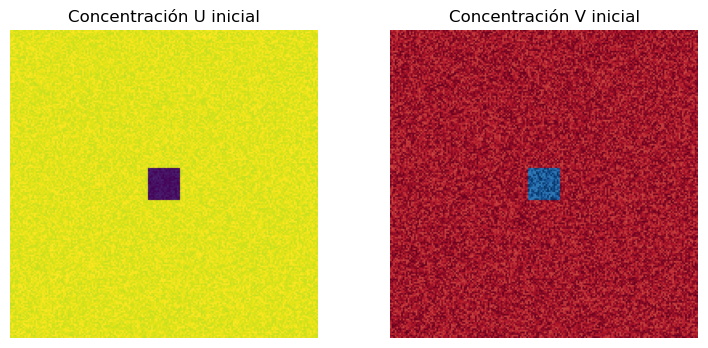

In [2]:
# Crea las matrices de U y V
U = np.ones((nx, ny))
V = np.zeros((nx, ny))

# Introduce una perturbación inicial
# Se usa un pequeño bloque en el centro
center_x, center_y = nx // 2, ny // 2
radius = 10
U[center_x-radius:center_x+radius, center_y-radius:center_y+radius] = 0.50
V[center_x-radius:center_x+radius, center_y-radius:center_y+radius] = 0.25

# Añade ruido aleatorio para romper la simetría
U += 0.05 * np.random.random((nx, ny))
V += 0.05 * np.random.random((nx, ny))

# Muestra el estado inicial
fig, ax = plt.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(U, cmap='viridis')
ax[0].set_title('Concentración U inicial')
ax[0].axis('off')
ax[1].imshow(V, cmap='RdBu')
ax[1].set_title('Concentración V inicial')
ax[1].axis('off')
plt.show()

### 3\. Función de simulación y animación

Esta celda contiene la lógica principal para resolver el sistema de ecuaciones. Usa un esquema de diferencias finitas en 2D para calcular el siguiente paso de tiempo. Se implementan condiciones de borde de **Neumann homogéneas**.

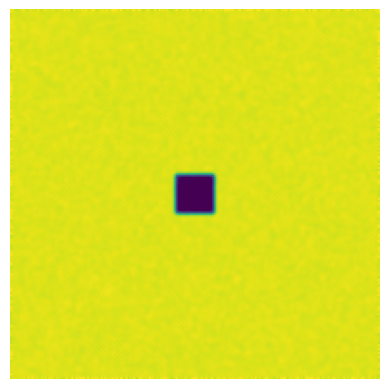

In [3]:
def laplacian2D(Z, dx, dy):
    # Calcula el Laplaciano usando diferencias finitas centradas
    # Se aplican condiciones de borde de Neumann homogéneas (derivada = 0)
    L = (Z[1:-1, 0:-2] + Z[1:-1, 2:] + Z[0:-2, 1:-1] + Z[2:, 1:-1] - 4 * Z[1:-1, 1:-1]) / dx**2
    return L

# Prepara el espacio para la animación
fig, ax = plt.subplots()
img = ax.imshow(U, cmap='viridis', animated=True)
plt.axis('off')

# Función para la animación
def update(frame):
    global U, V
    
    # Crea copias para el cálculo de las derivadas
    Un = U.copy()
    Vn = V.copy()

    # Aplica las condiciones de borde de Neumann homogéneas
    # (El Laplaciano ya se encarga de esto implícitamente en el interior)
    # Los bordes no se actualizan, manteniendo la condición de cero-flujo.
    
    # Calcula los Laplacianos
    lap_U = laplacian2D(Un, dx, dy)
    lap_V = laplacian2D(Vn, dx, dy)
    
    # Actualiza las concentraciones U y V
    U[1:-1, 1:-1] = Un[1:-1, 1:-1] + (Du * lap_U - Un[1:-1, 1:-1] * Vn[1:-1, 1:-1]**2 + F * (1 - Un[1:-1, 1:-1])) * dt
    V[1:-1, 1:-1] = Vn[1:-1, 1:-1] + (Dv * lap_V + Un[1:-1, 1:-1] * Vn[1:-1, 1:-1]**2 - (F + k) * Vn[1:-1, 1:-1]) * dt
    
    # Actualiza la imagen en la animación
    img.set_array(U)
    return img,

# Crea la animación
anim = FuncAnimation(fig, update, frames=200, interval=20, blit=True)
plt.show()
anim.save("gray_scott.gif", writer="pillow")



### 4\. Guardar resultados

Si deseas guardar el estado final de la simulación para su análisis posterior, puedes ejecutar esta celda.


In [4]:
# Guarda el estado final de las concentraciones en un archivo .npz
np.savez('uv_final.npz', U=U, V=V)

print("Simulación finalizada. Archivo 'uv_final.npz' guardado.")

Simulación finalizada. Archivo 'uv_final.npz' guardado.


In [5]:
import numpy as np

# Suponiendo que tu archivo se llama 'datos.npz'
# El objeto `data` contendrá todos los arrays del archivo
with np.load('uv_final.npz') as data:
    print("Arrays almacenados en el archivo npz:", data.files)
    pass

Arrays almacenados en el archivo npz: ['U', 'V']
